In [2]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('anemia.csv')

In [4]:
df.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


In [6]:
df.shape

(1421, 6)

In [7]:
#checking for the null values
df.isnull().sum()

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

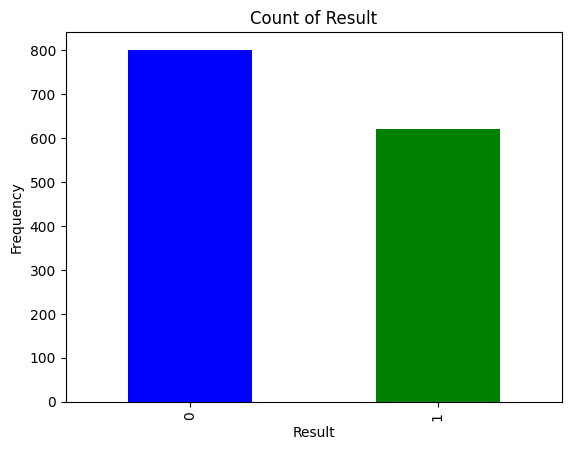

In [9]:
#0-not anemic 1-anemic
#checking for the count of anemia and not anemia

results=df['Result'].value_counts()
results.plot(kind='bar',color=['blue','green'])
plt.xlabel('Result')
plt.ylabel('Frequency')
plt.title('Count of Result')
plt.show()

In [10]:
#we can see that the female count is more than the male so, we can balance it using the undersampling
from sklearn.utils import resample
majorclass=df[df['Result'] == 0]
minorclass=df[df['Result'] == 1]
major_downsample = resample(majorclass, replace=False, n_samples=len(minorclass), random_state=42)
df = pd.concat([major_downsample,minorclass])
print(df['Result'].value_counts())

Result
0    620
1    620
Name: count, dtype: int64


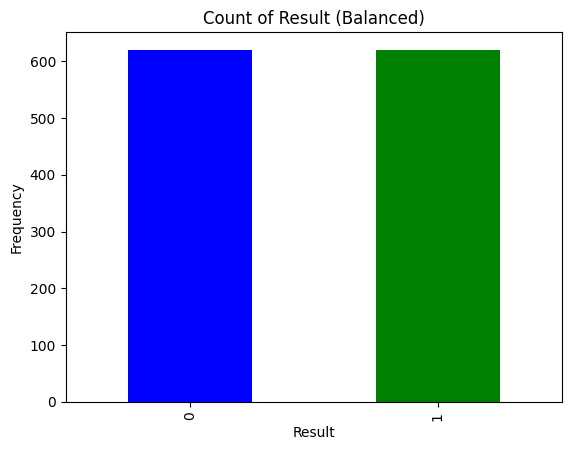

In [11]:
#Plot the balanced gender counts
result_balanced= df['Result'].value_counts()
result_balanced.plot(kind='bar', color=['blue','green'])
plt.xlabel('Result')
plt.ylabel('Frequency')
plt.title('Count of Result (Balanced)')
plt.show()

In [13]:
df.describe()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
count,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000
mean,0.540323,13.218145,22.903952,30.277984,85.620968,0.500000
std,0.498573,1.976190,3.993624,1.394515,9.673794,0.500202
min,0.000000,6.600000,16.000000,27.800000,69.400000,0.000000
25%,0.000000,11.500000,19.400000,29.100000,77.300000,0.000000
50%,1.000000,13.000000,22.700000,30.400000,85.300000,0.500000
75%,1.000000,14.900000,26.200000,31.500000,94.225000,1.000000
max,1.000000,16.900000,30.000000,32.500000,101.600000,1.000000


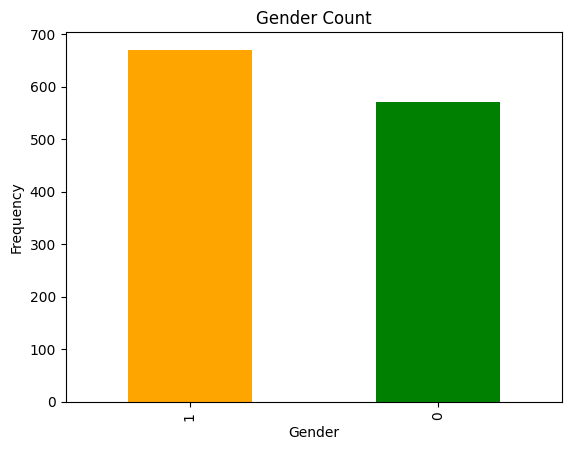

In [14]:
output=df['Gender'].value_counts()
output.plot(kind='bar',color=['orange', 'green'])
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Gender Count')
plt.show()

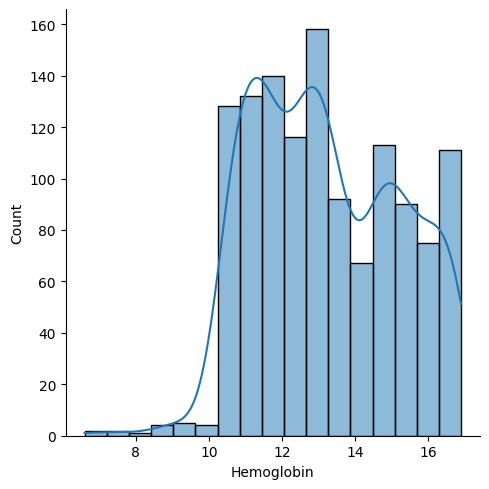

In [15]:
#hemoglobin
sns.displot(df['Hemoglobin'],kde=True)

C:\Users\varti\AppData\Local\Temp\ipykernel_13212\1295296129.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax= sns.barplot(y=df['Hemoglobin'],x=df['Gender'],hue=df['Result'],ci=None)


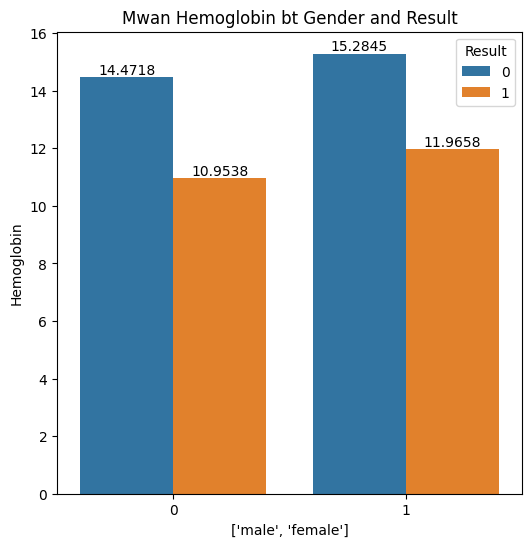

In [16]:
plt.figure(figsize=(6,6))
ax= sns.barplot(y=df['Hemoglobin'],x=df['Gender'],hue=df['Result'],ci=None)
ax.set(xlabel=['male','female'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Mwan Hemoglobin bt Gender and Result")
plt.show()

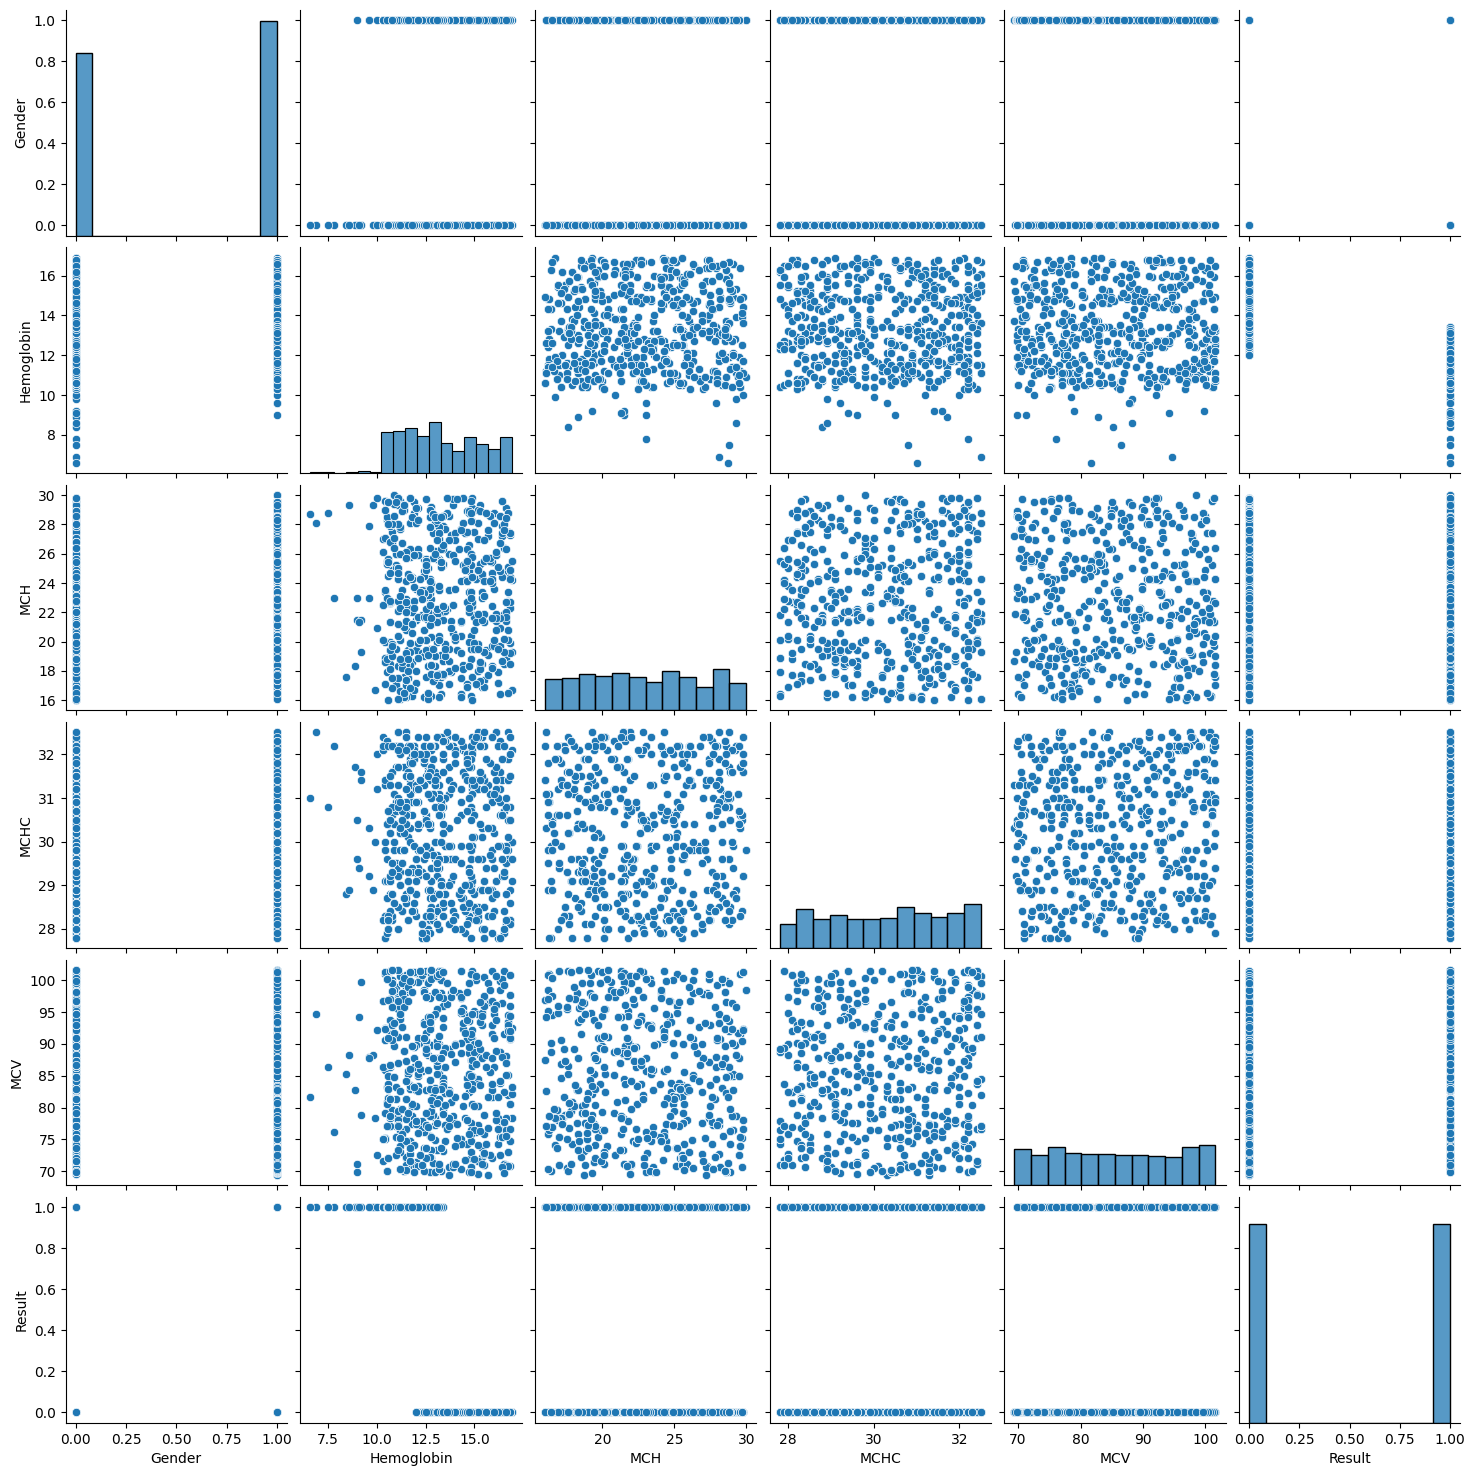

In [17]:
sns.pairplot(df)

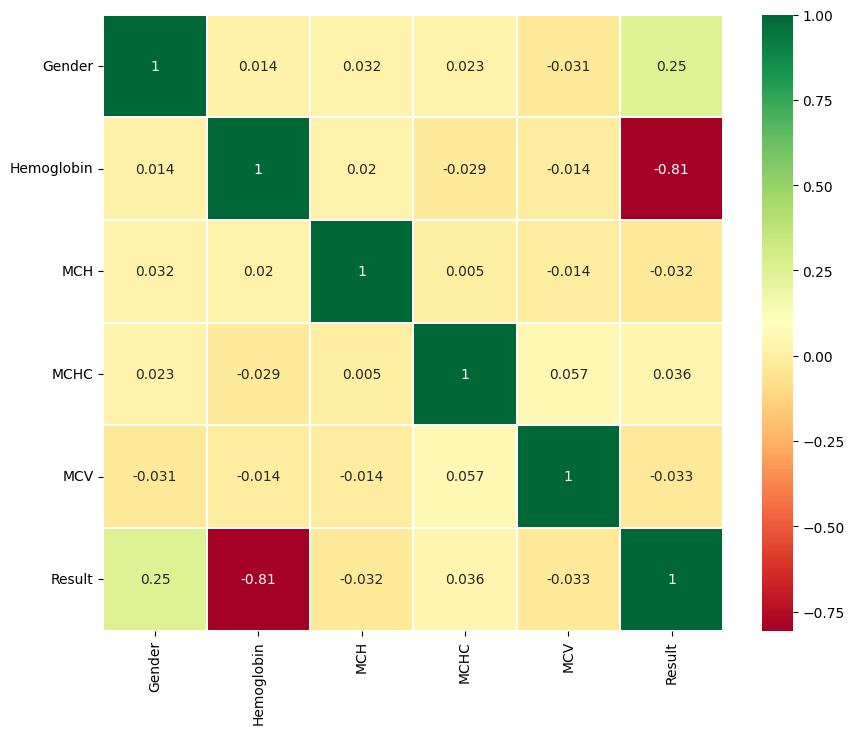

In [19]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
# data.corr() --> correlation matrix
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()


In [21]:
X=df.drop('Result',axis=1)
X


,Gender,Hemoglobin,MCH,MCHC,MCV
1234,1,16.6,18.8,28.1,70.9
1188,0,15.3,18.3,30.4,93.4
106,0,14.8,20.4,28.5,91.1
954,0,14.6,16.9,31.9,78.1
112,0,15.9,28.7,31.0,81.6
...,...,...,...,...,...
1415,1,13.2,20.1,28.8,91.2
1416,0,10.6,25.4,28.2,82.9
1417,1,12.1,28.3,30.4,86.9
1418,1,13.1,17.7,28.1,80.7


In [22]:
Y=df['Result']
Y

1234    0
1188    0
106     0
954     0
112     0
       ..
1415    1
1416    1
1417    1
1418    1
1420    1
Name: Result, Length: 1240, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=20)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(992, 5)
(248, 5)
(992,)
(248,)


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

logistic_regression=LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

acc_lr=accuracy_score(y_test,y_pred)
c_lr=classification_report(y_test,y_pred)

print('Accuracy Score:', acc_lr)
print(c_lr)

Accuracy Score: 0.9919354838709677
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       113
           1       0.99      1.00      0.99       135

    accuracy                           0.99       248
   macro avg       0.99      0.99      0.99       248
weighted avg       0.99      0.99      0.99       248



In [30]:
from sklearn.ensemble import RandomForestClassifier

random_forest=RandomForestClassifier()
random_forest.fit(X_train,y_train)
y_pred=random_forest.predict(X_test)

acc_rf = accuracy_score(y_test,y_pred)
c_rf=classification_report(y_test,y_pred)

print('Accuracy Score:' ,acc_lr)
print(c_rf)

Accuracy Score: 0.9919354838709677
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00       135

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248



In [31]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model=DecisionTreeClassifier()
decision_tree_model.fit(X_train,y_train)
y_pred=decision_tree_model.predict(X_test)

acc_dt = accuracy_score(y_test,y_pred)
c_dt=classification_report(y_test,y_pred)

print('Accuracy Score:' ,acc_dt)
print(c_dt)

Accuracy Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00       135

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248



In [32]:
from sklearn.naive_bayes import GaussianNB

NB=GaussianNB()
NB.fit(X_train,y_train)
y_pred=NB.predict(X_test)

acc_nb = accuracy_score(y_test,y_pred)
c_nb=classification_report(y_test,y_pred)

print('Accuracy Score:' ,acc_nb)
print(c_nb)

Accuracy Score: 0.9798387096774194
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       113
           1       0.97      0.99      0.98       135

    accuracy                           0.98       248
   macro avg       0.98      0.98      0.98       248
weighted avg       0.98      0.98      0.98       248



In [33]:
from sklearn.svm import SVC

support_vector=SVC()
support_vector.fit(X_train,y_train)
y_pred=support_vector.predict(X_test)

acc_svc = accuracy_score(y_test,y_pred)
c_svc=classification_report(y_test,y_pred)

print('Accuracy Score:' ,acc_svc)
print(c_svc)

Accuracy Score: 0.9395161290322581
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       113
           1       0.91      0.99      0.95       135

    accuracy                           0.94       248
   macro avg       0.95      0.93      0.94       248
weighted avg       0.94      0.94      0.94       248



In [34]:
from sklearn.ensemble import GradientBoostingClassifier

GBC=GradientBoostingClassifier()
GBC.fit(X_train,y_train)
y_pred=GBC.predict(X_test)

acc_gbc = accuracy_score(y_test,y_pred)
c_gbc=classification_report(y_test,y_pred)

print('Accuracy Score:' ,acc_gbc)
print(c_gbc)

Accuracy Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00       135

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248



In [35]:
prediction=GBC.predict([[0,11.6,22.3,30.9,74.5]])


C:\Users\varti\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [36]:
prediction[0]

np.int64(1)

In [37]:
if prediction[0]==0:
    print("You don't have any Anemic Disease")
elif prediction[0]==1:
    print("You have anemic disease")

You have anemic disease


In [38]:
model=pd.DataFrame({'Model':['Linear Regression','Decision Tree Classifier','RandomForest Classifier','Gaussian Naive Bayes','Support Vector Classifier','Gradient Boost Classifier'],'Score':[acc_lr,acc_dt,acc_rf,acc_nb,acc_svc,acc_gbc],})

In [39]:
model

,Model,Score
0,Linear Regression,0.991935
1,Decision Tree Classifier,1.000000
2,RandomForest Classifier,1.000000
3,Gaussian Naive Bayes,0.979839
4,Support Vector Classifier,0.939516
5,Gradient Boost Classifier,1.000000


In [41]:
import pickle
import warnings
pickle.dump(GBC,open("model.pkl","wb"))